In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [56]:
df = pd.read_csv("Excels\\mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [57]:
df['cap-shape'].unique()

array(['x', 'b', 's', 'f', 'k', 'c'], dtype=object)

In [58]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [59]:
df = pd.get_dummies(df,drop_first=True)
df.head()

,class_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,True,False,False,False,False,True,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False,True,False,False,...,True,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,True,False,False,False
3,True,False,False,False,False,True,False,False,True,False,...,False,True,False,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False


In [60]:
df.rename(columns={
    "class_p" : "class"
},inplace=True)
df.head()

,class,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,True,False,False,False,False,True,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False,True,False,False,...,True,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,True,False,False,False
3,True,False,False,False,False,True,False,False,True,False,...,False,True,False,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False


In [61]:
from sklearn.model_selection import train_test_split
X = df.drop(['class'],axis='columns')
y= df['class']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score , precision_score

In [72]:
tree_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
log_model = LogisticRegression()
svm_model = SVC(C=1.0, kernel='rbf')
nn_model = MLPClassifier(hidden_layer_sizes=(128, 128))

In [73]:
tree_model.fit(X_train,y_train)
rf_model.fit(X_train,y_train)
log_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
nn_model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(128, 128))

In [74]:
print(f"---Logistic Regression: {tree_model.score(X_test, y_test)}")
print(f"---Logistic Regression: {rf_model.score(X_test, y_test)}")
print(f"---Logistic Regression: {log_model.score(X_test, y_test)}")
print(f"Support Vector Machine: {svm_model.score(X_test, y_test)}")
print(f"--------Neural Network: {nn_model.score(X_test, y_test)}")

---Logistic Regression: 1.0
---Logistic Regression: 1.0
---Logistic Regression: 1.0
Support Vector Machine: 1.0
--------Neural Network: 1.0


In [88]:
ree_accuracy = accuracy_score(y_test, tree_pred)
tree_recall = recall_score(y_test, tree_pred)

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

log_accuracy = accuracy_score(y_test, log_pred)
log_recall = recall_score(y_test, log_pred)

svm_accuracy = accuracy_score(y_test, svm_pred)
svm_recall = recall_score(y_test, svm_pred)

nn_accuracy = accuracy_score(y_test, nn_pred)
nn_recall = recall_score(y_test, nn_pred)

# Print the scores
print("Decision Tree: Accuracy =", tree_accuracy, "Recall =", tree_recall)
print("Random Forest: Accuracy =", rf_accuracy, "Recall =", rf_recall)
print("Logistic Regression: Accuracy =", log_accuracy, "Recall =", log_recall)
print("SVM: Accuracy =", svm_accuracy, "Recall =", svm_recall)
print("Neural Network: Accuracy =", nn_accuracy, "Recall =", nn_recall)

Decision Tree: Accuracy = 1.0 Recall = 1.0
Random Forest: Accuracy = 1.0 Recall = 1.0
Logistic Regression: Accuracy = 1.0 Recall = 1.0
SVM: Accuracy = 1.0 Recall = 1.0
Neural Network: Accuracy = 1.0 Recall = 1.0


<Axes: >

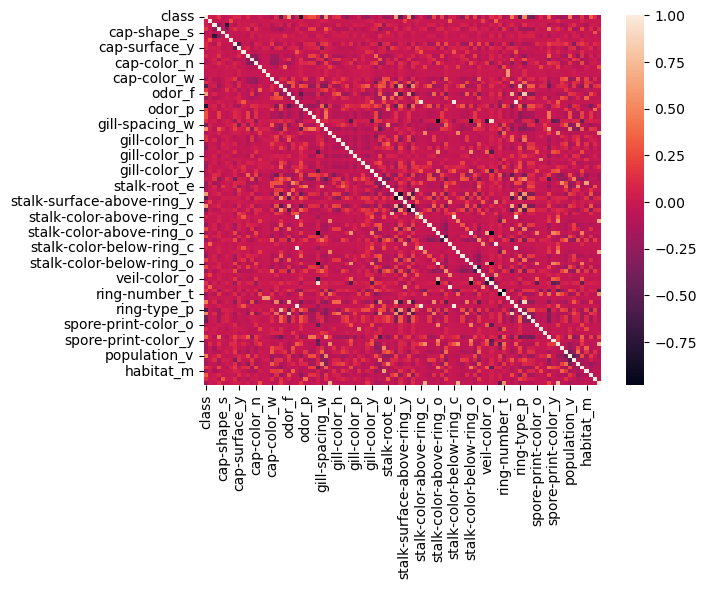

In [69]:
corr = df.corr()

sns.heatmap(corr)